In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
res_path = './results/'
obj = 'long_term_forecast_iTransformer_Exchange_96_96_iTransformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el4_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1726629364)/'
pred_data = np.load(res_path + obj + 'pred.npy')
true_data = np.load(res_path + obj + 'true.npy')

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# PRED -> 96 
# TRUE -> 96
len(true_data)

1422

In [7]:
idx = 0

# pred -> LinearRegression
X = np.array([[t] for t in range(-96, 0)])
lin_predicts = [[LinearRegression().fit(X, true_data[jdx, :, var]) for var in range(8)] for jdx in range(len(true_data)-96)]

In [8]:
lin_result_pre = [[lin_predicts[jdx][var].predict([[t] for t in range(-96, 0)]) for var in range(8)] for jdx in range(len(true_data)-96)]

In [14]:
lin_result_pre_0 = np.array(lin_result_pre).transpose(0,2,1)

In [9]:
lin_result_post = [[lin_predicts[jdx][var].predict([[t] for t in range(96)]) for var in range(8)] for jdx in range(len(true_data)-96)]

In [10]:
lin_result_post_0 = np.array(lin_result_post)

In [12]:
lin_result_post_0 = lin_result_post_0.transpose(0, 2, 1)

In [15]:
# 이제 그래프 비교
# metric
from utils.metrics import *

In [26]:
MSE(pred_data[96:], true_data[96:]), MAE(pred_data[96:], true_data[96:]), SMAE(pred_data[96:], true_data[96:]), REC_CORR(pred_data[96:], true_data[96:])

(0.09739974, 0.22503524, -0.032572605, -0.09685630039836977)

In [25]:
MSE(lin_result_post_0, true_data[96:]), MAE(lin_result_post_0, true_data[96:]), SMAE(lin_result_post_0, true_data[96:]), REC_CORR(lin_result_post_0, true_data[96:])

(0.15735950301290744,
 0.28523949606811827,
 0.0035622956868053886,
 0.016265974071903028)

In [21]:
%matplotlib inline

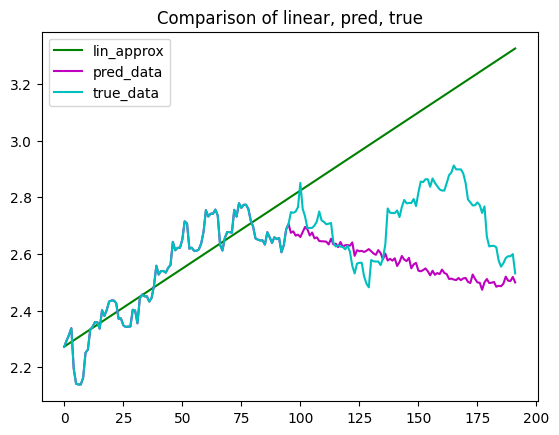

In [28]:
idx = 452
var = -1
X = range(192)
plt.plot(X, np.concatenate([lin_result_pre_0[idx, :, var],lin_result_post_0[idx, :, var]]), 'g', label='lin_approx')
plt.plot(X, np.concatenate([true_data[idx, :, var], pred_data[idx+96, :, var]]), 'm-', label='pred_data')
plt.plot(X, np.concatenate([true_data[idx, :, var], true_data[idx+96, :, var]]), 'c-', label='true_data')
plt.title("Comparison of linear, pred, true")
plt.legend()
plt.show()

In [140]:
# alpha 학습후 보정

alphas = [1 for _ in range(1000)]
new_alpha = []
new_results = []
# 각 step마다 SMAE 기준으로 보정하기
for alpha in range(1000):
    me1 = SMAE(lin_result_post_0[alpha], true_data[alpha+96])
    me2 = SMAE(pred_data[alpha+96], true_data[alpha+96])
    ratio = (me2)/(me2 - 1*me1) # me2
    ratio = max(0, min(ratio, 1))
    ratio = 0.8
    new_alpha.append(ratio)
    new_result = ratio * pred_data[alpha+96] + (1-ratio) * lin_result_post_0[alpha] - 0.037
    new_results.append(new_result)

new_results = np.stack(new_results, axis=0)
    

In [145]:
new_alpha

[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8

In [141]:
MSE(new_results, true_data[96:1096]), MAE(new_results, true_data[96:1096]), SMAE(new_results, true_data[96:1096])

(0.09223184586832552, 0.22097694455722985, -0.0026777343172206423)

In [142]:
MSE(pred_data[96:1096], true_data[96:1096]), MAE(pred_data[96:1096], true_data[96:1096]), SMAE(pred_data[96:1096], true_data[96:1096])

(0.09561783, 0.22180171, -0.05193206)

In [143]:
MSE(lin_result_post_0[:1000], true_data[96:1096]), MAE(lin_result_post_0[:1000], true_data[96:1096]), SMAE(lin_result_post_0[:1000], true_data[96:1096])

(0.15979093324570004, 0.2850925028082456, 0.009339651868106848)

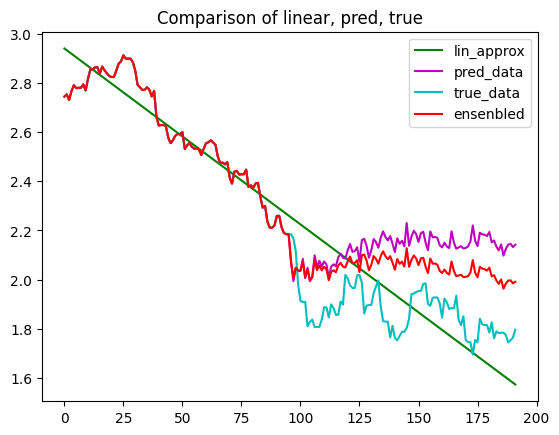

In [148]:
idx = 592
var = -1
X = range(192)
plt.plot(X, np.concatenate([lin_result_pre_0[idx, :, var],lin_result_post_0[idx, :, var]]), 'g', label='lin_approx')
plt.plot(X, np.concatenate([true_data[idx, :, var], pred_data[idx+96, :, var]]), 'm-', label='pred_data')
plt.plot(X, np.concatenate([true_data[idx, :, var], true_data[idx+96, :, var]]), 'c-', label='true_data')
plt.plot(X, np.concatenate([true_data[idx, :, var], new_results[idx, :, var]]), 'r-', label='ensenbled')
plt.title("Comparison of linear, pred, true")
plt.legend()
plt.show()
